<a href="https://colab.research.google.com/github/raka-raprast/churn-prediction-svm/blob/main/Churn_Prediction_Using_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Churn Prediction Using Support Vector Machine**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakaraprasetyo","key":"168203d666b12e693dc4b5eff3380a06"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d yeanzc/telco-customer-churn-ibm-dataset

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 41.6MB/s]


In [7]:
!unzip telco-customer-churn-ibm-dataset.zip

Archive:  telco-customer-churn-ibm-dataset.zip
  inflating: Telco_customer_churn.xlsx  


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_excel ("Telco_customer_churn.xlsx")
df.sample(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
5120,0257-KXZGU,1,United States,California,Santa Clara,95051,"37.348129, -121.98469",37.348129,-121.984690,Female,No,Yes,Yes,32,Yes,Yes,DSL,No,Yes,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),62.45,2045.55,No,0,74,5442,NaN
1109,3066-RRJIO,1,United States,California,San Francisco,94132,"37.722302, -122.491129",37.722302,-122.491129,Female,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,69.95,69.95,Yes,1,65,5341,Competitor made better offer
391,9809-IMGCQ,1,United States,California,Canyon Dam,95923,"40.171312, -121.120605",40.171312,-121.120605,Male,Yes,No,No,22,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.70,2082.95,Yes,1,93,4458,Competitor made better offer
1201,4877-EVATK,1,United States,California,Elk,95432,"39.108252, -123.645121",39.108252,-123.645121,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,20,Yes,1,83,3657,Competitor offered more data
1728,0520-FDVVT,1,United States,California,Lewiston,96052,"40.704293, -122.803899",40.704293,-122.803899,Male,No,No,No,35,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),102.35,3626.1,Yes,1,80,2473,Price too high


In [10]:
df.info

<bound method DataFrame.info of       CustomerID  Count  ...  CLTV                   Churn Reason
0     3668-QPYBK      1  ...  3239   Competitor made better offer
1     9237-HQITU      1  ...  2701                          Moved
2     9305-CDSKC      1  ...  5372                          Moved
3     7892-POOKP      1  ...  5003                          Moved
4     0280-XJGEX      1  ...  5340  Competitor had better devices
...          ...    ...  ...   ...                            ...
7038  2569-WGERO      1  ...  5306                            NaN
7039  6840-RESVB      1  ...  2140                            NaN
7040  2234-XADUH      1  ...  5560                            NaN
7041  4801-JZAZL      1  ...  2793                            NaN
7042  3186-AJIEK      1  ...  5097                            NaN

[7043 rows x 33 columns]>

In [11]:
df.columns = ['customer_id', 'count', 'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure_month', 'phone_service', 'multiple_line', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn_label', 'churn_value', 'churn_score', 'cltv', 'churn_reason']

In [12]:
df.tail(10)

,customer_id,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_month,phone_service,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
7033,0871-OPBXW,1,United States,California,Twentynine Palms,92277,"34.17211, -115.769773",34.172110,-115.769773,Female,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No,0,80,5191,NaN
7034,3605-JISKB,1,United States,California,Twentynine Palms,92278,"34.457829, -116.139589",34.457829,-116.139589,Male,Yes,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No,0,71,4212,NaN
7035,9767-FFLEM,1,United States,California,Westmorland,92281,"33.03679, -115.60503",33.036790,-115.605030,Male,No,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,0,35,4591,NaN
7036,8456-QDAVC,1,United States,California,Winterhaven,92283,"32.852947, -114.850784",32.852947,-114.850784,Male,No,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No,0,20,2464,NaN
7037,7750-EYXWZ,1,United States,California,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,Female,No,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No,0,24,3740,NaN
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


**Data Manipulation**

In [13]:
dfn = df.copy()

In [14]:
dfn.dtypes

customer_id           object
count                  int64
country               object
state                 object
city                  object
zip_code               int64
lat_long              object
latitude             float64
longitude            float64
gender                object
senior_citizen        object
partner               object
dependents            object
tenure_month           int64
phone_service         object
multiple_line         object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn_label           object
churn_value            int64
churn_score            int64
cltv                   int64
churn_reason          object
dtype: object

In [15]:
dfn.tail(10)

,customer_id,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_month,phone_service,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,cltv,churn_reason
7033,0871-OPBXW,1,United States,California,Twentynine Palms,92277,"34.17211, -115.769773",34.172110,-115.769773,Female,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No,0,80,5191,NaN
7034,3605-JISKB,1,United States,California,Twentynine Palms,92278,"34.457829, -116.139589",34.457829,-116.139589,Male,Yes,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No,0,71,4212,NaN
7035,9767-FFLEM,1,United States,California,Westmorland,92281,"33.03679, -115.60503",33.036790,-115.605030,Male,No,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,0,35,4591,NaN
7036,8456-QDAVC,1,United States,California,Winterhaven,92283,"32.852947, -114.850784",32.852947,-114.850784,Male,No,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No,0,20,2464,NaN
7037,7750-EYXWZ,1,United States,California,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,Female,No,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No,0,24,3740,NaN
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [16]:
dfn[['churn_reason']] = dfn[['churn_reason']].fillna('Not Churn')

In [17]:
dfn['total_charges'] = dfn['total_charges'].replace(' ', np.nan)

In [18]:
dfn['total_charges'] = dfn['total_charges'].astype('float64')

In [19]:
dfn.dtypes

customer_id           object
count                  int64
country               object
state                 object
city                  object
zip_code               int64
lat_long              object
latitude             float64
longitude            float64
gender                object
senior_citizen        object
partner               object
dependents            object
tenure_month           int64
phone_service         object
multiple_line         object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn_label           object
churn_value            int64
churn_score            int64
cltv                   int64
churn_reason          object
dtype: object

In [20]:
dfn["internet_service"] = dfn["internet_service"].astype('category')
dfn["gender"] = dfn["gender"].astype('category')
dfn["contract"] = dfn["contract"].astype('category')
dfn["payment_method"] = dfn["payment_method"].astype('category')
dfn['senior_citizen'] = dfn['senior_citizen'].astype('category')
dfn['partner'] = dfn['partner'].astype('category')
dfn['dependents'] = dfn['dependents'].astype('category')
dfn['multiple_line'] = dfn['multiple_line'].astype('category')
dfn['online_security'] = dfn['online_security'].astype('category')
dfn['online_backup'] = dfn['online_backup'].astype('category')
dfn['device_protection'] = dfn['device_protection'].astype('category')
dfn['tech_support'] = dfn['tech_support'].astype('category')
dfn['streaming_tv'] = dfn['streaming_tv'].astype('category')
dfn['streaming_movies'] = dfn['streaming_movies'].astype('category')
dfn['paperless_billing'] = dfn['paperless_billing'].astype('category')
dfn['churn_reason'] = dfn['churn_reason'].astype('category')

In [21]:
dfn = dfn.drop(['customer_id', 'count', 'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude', 'longitude', 'phone_service', 'churn_label' ], axis = 1)

In [22]:
dfn['senior_citizen'] = dfn['senior_citizen'].map(
                   {'Yes':1 ,'No':0})
dfn['partner'] = dfn['partner'].map(
                   {'Yes':1 ,'No':0})
dfn['dependents'] = dfn['dependents'].map(
                   {'Yes':1 ,'No':0})
dfn['multiple_line'] = dfn['multiple_line'].map(
                   {'Yes':1 ,'No':0, 'No phone service':0})
dfn['online_security'] = dfn['online_security'].map(
                   {'Yes':1 ,'No':0, 'No internet service':0})
dfn['online_backup'] = dfn['online_backup'].map(
                   {'Yes':1 ,'No':0, 'No internet service':0})
dfn['device_protection'] = dfn['device_protection'].map(
                   {'Yes':1 ,'No':0, 'No internet service':0})
dfn['tech_support'] = dfn['tech_support'].map(
                   {'Yes':1 ,'No':0, 'No internet service':0})
dfn['streaming_tv'] = dfn['streaming_tv'].map(
                   {'Yes':1 ,'No':0, 'No internet service':0})
dfn['streaming_movies'] = dfn['streaming_movies'].map(
                   {'Yes':1 ,'No':0, 'No internet service':0})
dfn['paperless_billing'] = dfn['paperless_billing'].map(
                   {'Yes':1 ,'No':0})

In [23]:
dfn['gender'] = dfn['gender'].cat.codes
dfn['senior_citizen'] = dfn['senior_citizen'].cat.codes
dfn['partner'] = dfn['partner'].cat.codes
dfn['dependents'] = dfn['dependents'].cat.codes
dfn['paperless_billing'] = dfn['paperless_billing'].cat.codes
dfn["internet_service"] = dfn["internet_service"].cat.codes
dfn["contract"] = dfn["contract"].cat.codes
dfn["payment_method"] = dfn["payment_method"].cat.codes
dfn["churn_reason"] = dfn["churn_reason"].cat.codes

In [24]:
dfn["internet_service"] = dfn["internet_service"].astype('int64')
dfn["gender"] = dfn["gender"].astype('int64')
dfn["contract"] = dfn["contract"].astype('int64')
dfn["payment_method"] = dfn["payment_method"].astype('int64')
dfn['senior_citizen'] = dfn['senior_citizen'].astype('int64')
dfn['partner'] = dfn['partner'].astype('int64')
dfn['dependents'] = dfn['dependents'].astype('int64')
dfn['paperless_billing'] = dfn['paperless_billing'].astype('int64')
dfn['churn_reason'] = dfn['churn_reason'].astype('int64')

In [25]:
dfn.dtypes

gender                 int64
senior_citizen         int64
partner                int64
dependents             int64
tenure_month           int64
multiple_line          int64
internet_service       int64
online_security        int64
online_backup          int64
device_protection      int64
tech_support           int64
streaming_tv           int64
streaming_movies       int64
contract               int64
paperless_billing      int64
payment_method         int64
monthly_charges      float64
total_charges        float64
churn_value            int64
churn_score            int64
cltv                   int64
churn_reason           int64
dtype: object

**Exploratory Data Analysis**

In [26]:
import seaborn as sns

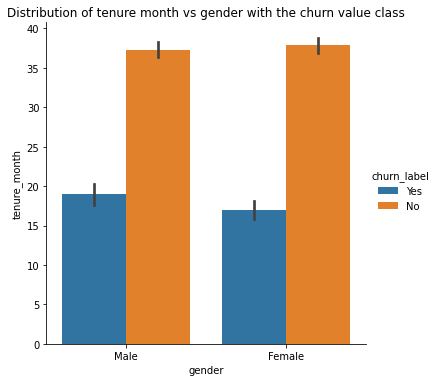

In [27]:
sns.catplot(kind = 'bar', data = df, y = 'tenure_month', x = 'gender', hue = 'churn_label')
plt.title('Distribution of tenure month vs gender with the churn value class')
plt.show()

In [28]:
numeric_column = ['gender', 'senior_citizen', 'partner', 'multiple_line', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'churn_value', 'churn_reason', 'monthly_charges', 'total_charges', 'churn_score', 'cltv', 'tenure_month']

In [29]:
dfn[numeric_column].describe()

,gender,senior_citizen,partner,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn_value,churn_reason,monthly_charges,total_charges,churn_score,cltv,tenure_month
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.421837,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329,0.265370,13.085759,64.761692,2283.300441,58.699418,4400.295755,32.371149
std,0.500013,0.368612,0.499748,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,0.441561,4.562205,30.090047,2266.771362,21.525131,1183.057152,24.559481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,5.000000,2003.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000,35.500000,401.450000,40.000000,3469.000000,9.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,15.000000,70.350000,1397.475000,61.000000,4527.000000,29.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,15.000000,89.850000,3794.737500,75.000000,5380.500000,55.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,20.000000,118.750000,8684.800000,100.000000,6500.000000,72.000000


In [30]:
dfn[dfn.isnull().any(axis=1)]

,gender,senior_citizen,partner,dependents,tenure_month,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv,churn_reason
2234,0,0,1,0,0,0,0,1,0,1,1,1,0,2,1,0,52.55,NaN,0,36,2578,15
2438,1,0,0,0,0,0,2,0,0,0,0,0,0,2,0,3,20.25,NaN,0,68,5504,15
2568,0,0,1,0,0,0,0,1,1,1,0,1,1,2,0,3,80.85,NaN,0,45,2048,15
2667,1,0,1,1,0,1,2,0,0,0,0,0,0,2,0,3,25.75,NaN,0,48,4950,15
2856,0,0,1,0,0,0,0,1,1,1,1,1,0,2,0,1,56.05,NaN,0,30,4740,15
4331,1,0,1,1,0,0,2,0,0,0,0,0,0,2,0,3,19.85,NaN,0,53,2019,15
4687,1,0,1,1,0,1,2,0,0,0,0,0,0,2,0,3,25.35,NaN,0,49,2299,15
5104,0,0,1,1,0,0,2,0,0,0,0,0,0,2,0,3,20.00,NaN,0,27,3763,15
5719,1,0,1,1,0,0,2,0,0,0,0,0,0,1,1,3,19.70,NaN,0,69,4890,15
6772,0,0,1,1,0,1,0,0,1,1,1,1,0,2,0,3,73.35,NaN,0,44,2342,15


In [31]:
dfn.dropna(subset = ["total_charges"], inplace=True)

In [32]:
dfn.isnull().sum().sum()

0

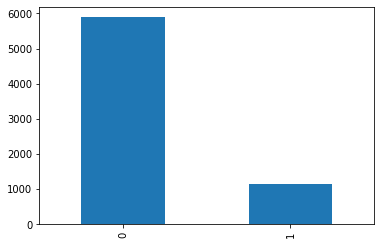

In [33]:
dfn.senior_citizen.value_counts().plot(kind='bar');

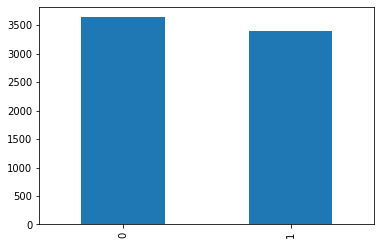

In [34]:
dfn.partner.value_counts().plot(kind='bar');

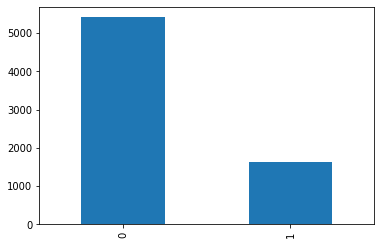

In [35]:
dfn.dependents.value_counts().plot(kind='bar');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


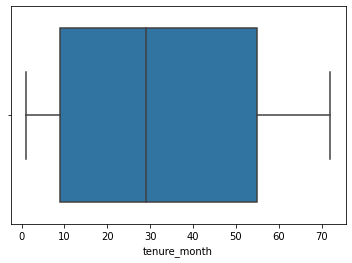

In [36]:
sns.boxplot(dfn['tenure_month']);

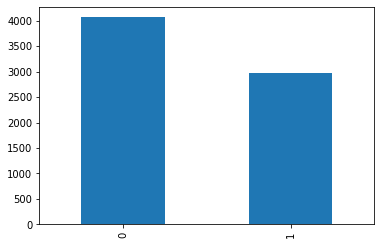

In [37]:
dfn.multiple_line.value_counts().plot(kind='bar');

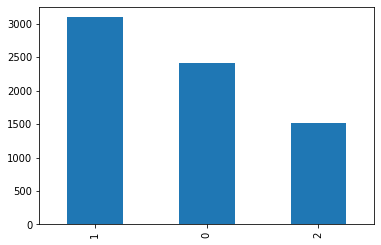

In [38]:
dfn.internet_service.value_counts().plot(kind='bar');

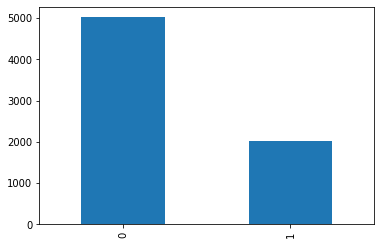

In [39]:
dfn.online_security.value_counts().plot(kind='bar');

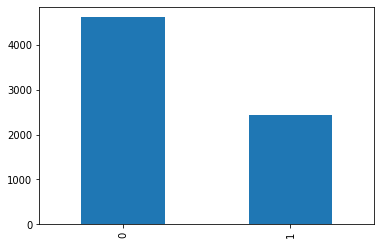

In [40]:
dfn.online_backup.value_counts().plot(kind='bar')

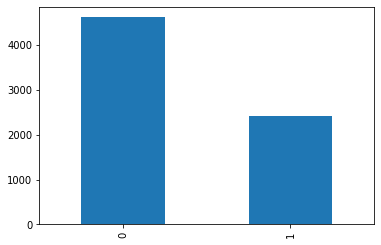

In [41]:
dfn.device_protection.value_counts().plot(kind='bar')

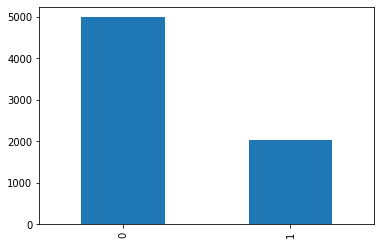

In [42]:
dfn.tech_support.value_counts().plot(kind='bar')

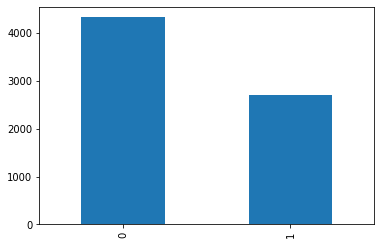

In [43]:
dfn.streaming_tv.value_counts().plot(kind='bar')

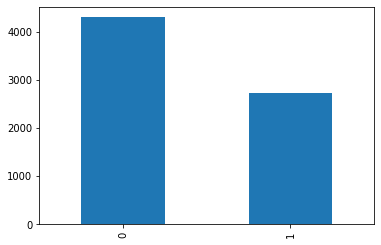

In [44]:
dfn.streaming_movies.value_counts().plot(kind='bar')

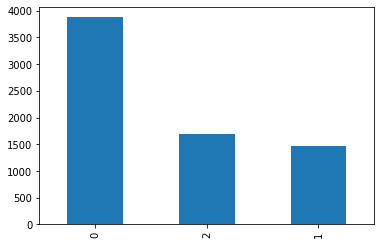

In [45]:
dfn.contract.value_counts().plot(kind='bar')

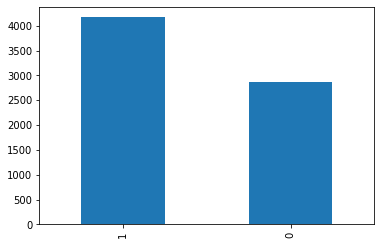

In [46]:
dfn.paperless_billing.value_counts().plot(kind='bar')

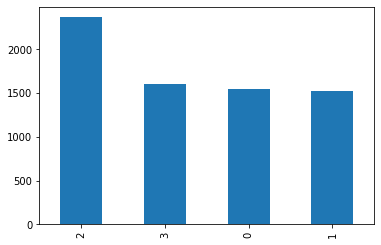

In [47]:
dfn.payment_method.value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


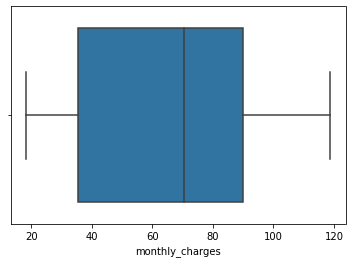

In [48]:
sns.boxplot(dfn['monthly_charges']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


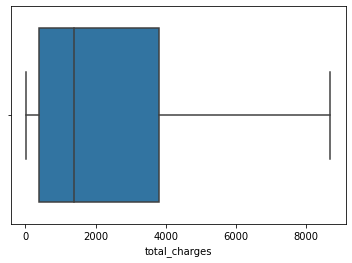

In [49]:
sns.boxplot(dfn['total_charges']);

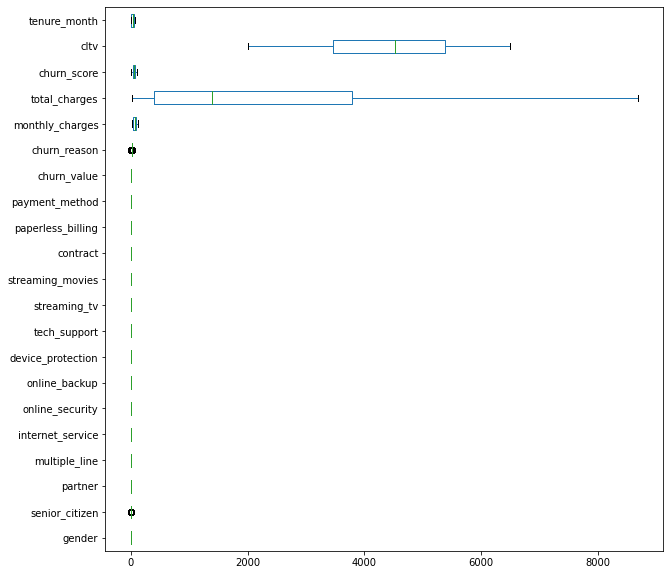

In [50]:
dfn.boxplot(column=numeric_column,fontsize=10,rot=0,grid=False,figsize=(10,10),vert=False)

In [51]:
numeric_column_filtered = ['gender', 'partner', 'multiple_line', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'churn_value', 'monthly_charges', 'total_charges', 'churn_score', 'cltv', 'tenure_month']

In [52]:
Q1 = dfn[numeric_column].quantile(0.25)
Q3 = dfn[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 gender                  0.0000
senior_citizen          0.0000
partner                 0.0000
multiple_line           0.0000
internet_service        0.0000
online_security         0.0000
online_backup           0.0000
device_protection       0.0000
tech_support            0.0000
streaming_tv            0.0000
streaming_movies        0.0000
contract                0.0000
paperless_billing       0.0000
payment_method          1.0000
churn_value             0.0000
churn_reason           15.0000
monthly_charges        35.5875
total_charges         401.4500
churn_score            40.0000
cltv                 3469.7500
tenure_month            9.0000
Name: 0.25, dtype: float64

Q3:
 gender                  1.0000
senior_citizen          0.0000
partner                 1.0000
multiple_line           1.0000
internet_service        1.0000
online_security         1.0000
online_backup           1.0000
device_protection       1.0000
tech_support            1.0000
streaming_tv            1.0000
s

In [53]:
non_outlier_df = dfn.copy()
for x in numeric_column_filtered:
  filter_min = non_outlier_df[x]<boxplot_min[x]
  filter_max = non_outlier_df[x]>boxplot_max[x]
  non_outlier_df = non_outlier_df[~(
    filter_min|filter_max
    )]

In [54]:
non_outlier_df.head(20)

,gender,senior_citizen,partner,dependents,tenure_month,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv,churn_reason
0,1,0,0,0,2,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1,86,3239,3
1,0,0,0,1,2,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,67,2701,13
2,0,0,0,1,8,1,1,0,0,1,0,1,1,0,1,2,99.65,820.50,1,86,5372,13
3,0,0,1,1,28,1,1,0,0,1,1,1,1,0,1,2,104.80,3046.05,1,84,5003,13
4,1,0,0,1,49,1,1,0,1,1,0,1,1,0,1,0,103.70,5036.30,1,89,5340,2
5,0,0,1,0,10,0,0,0,0,1,1,0,0,0,0,1,55.20,528.35,1,78,5925,4
6,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,2,39.65,39.65,1,100,5433,5
7,1,0,0,0,1,0,2,0,0,0,0,0,0,0,0,3,20.15,20.15,1,92,4832,3
8,1,0,1,1,47,1,1,0,1,0,0,1,1,0,1,2,99.35,4749.15,1,77,5789,2
9,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,2,30.20,30.20,1,97,2915,2


In [55]:
non_outlier_df.shape

(7032, 22)

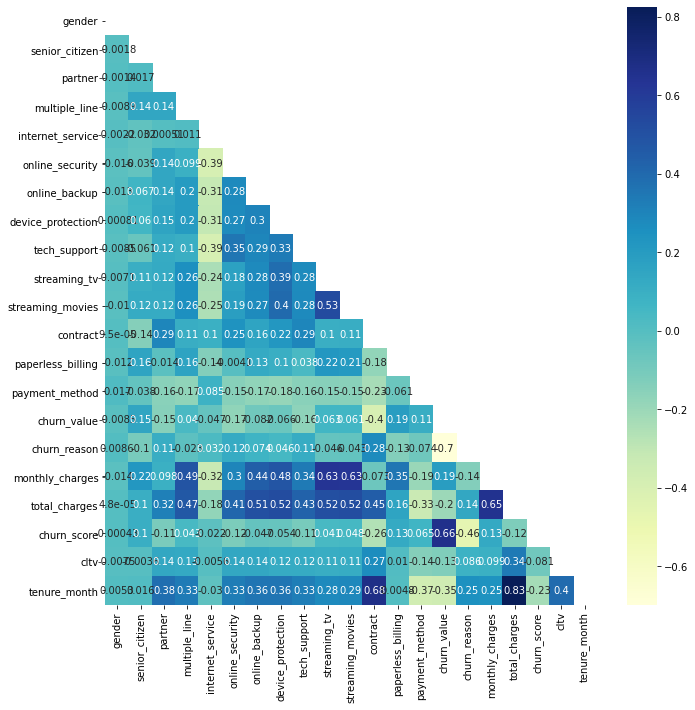

In [56]:
correlation_between_column = non_outlier_df[numeric_column].corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":10},mask=upper_triangle_corr)

In [57]:
numeric_column_final = ['gender', 'partner', 'senior_citizen', 'multiple_line', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'paperless_billing', 'payment_method', 'churn_value', 'monthly_charges', 'tenure_month']

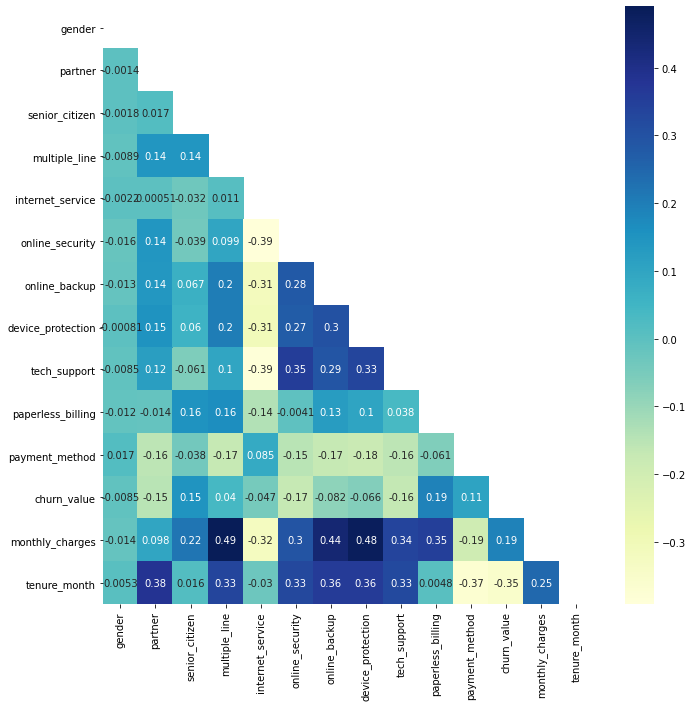

In [58]:
correlation_between_column = non_outlier_df[numeric_column_final].corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":10},mask=upper_triangle_corr)

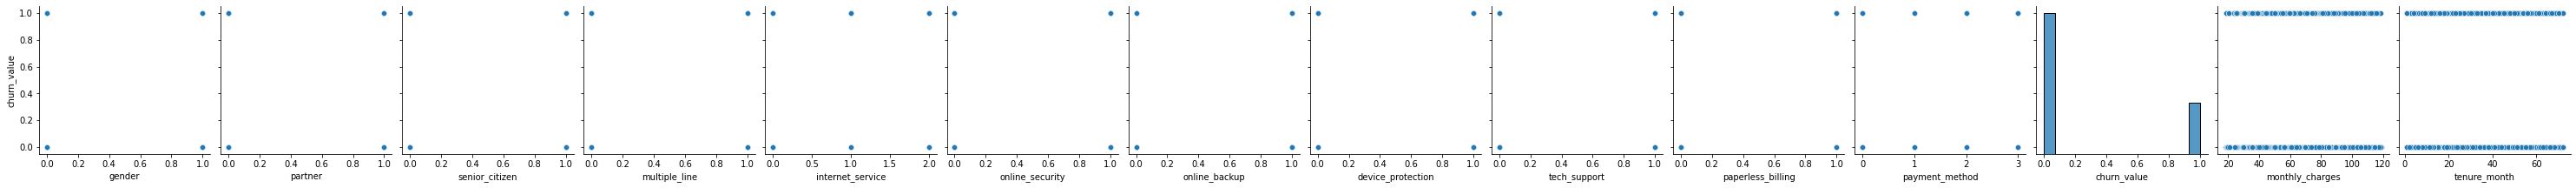

In [59]:
scatter_plot_between_target_feature = sns.pairplot(
    data=dfn,
    y_vars=['churn_value'],
    x_vars=numeric_column_final,
    height=3,
    kind='scatter'
    )

In [60]:
dfn.dtypes

gender                 int64
senior_citizen         int64
partner                int64
dependents             int64
tenure_month           int64
multiple_line          int64
internet_service       int64
online_security        int64
online_backup          int64
device_protection      int64
tech_support           int64
streaming_tv           int64
streaming_movies       int64
contract               int64
paperless_billing      int64
payment_method         int64
monthly_charges      float64
total_charges        float64
churn_value            int64
churn_score            int64
cltv                   int64
churn_reason           int64
dtype: object

**Random Oversampling**

In [61]:
final_column = numeric_column_final
final_df = non_outlier_df[final_column]

In [62]:
non_outlier_df

,gender,senior_citizen,partner,dependents,tenure_month,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_score,cltv,churn_reason
0,1,0,0,0,2,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1,86,3239,3
1,0,0,0,1,2,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,67,2701,13
2,0,0,0,1,8,1,1,0,0,1,0,1,1,0,1,2,99.65,820.50,1,86,5372,13
3,0,0,1,1,28,1,1,0,0,1,1,1,1,0,1,2,104.80,3046.05,1,84,5003,13
4,1,0,0,1,49,1,1,0,1,1,0,1,1,0,1,0,103.70,5036.30,1,89,5340,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,0,2,0,0,0,0,0,0,2,1,0,21.15,1419.40,0,45,5306,15
7039,1,0,1,1,24,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0,59,2140,15
7040,0,0,1,1,72,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0,71,5560,15
7041,0,0,1,1,11,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0,59,2793,15


In [63]:
final_df

,gender,partner,senior_citizen,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,paperless_billing,payment_method,churn_value,monthly_charges,tenure_month
0,1,0,0,0,0,1,1,0,0,1,3,1,53.85,2
1,0,0,0,0,1,0,0,0,0,1,2,1,70.70,2
2,0,0,0,1,1,0,0,1,0,1,2,1,99.65,8
3,0,1,0,1,1,0,0,1,1,1,2,1,104.80,28
4,1,0,0,1,1,0,1,1,0,1,0,1,103.70,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,2,0,0,0,0,1,0,0,21.15,72
7039,1,1,0,1,0,1,0,1,1,1,3,0,84.80,24
7040,0,1,0,1,1,0,1,1,0,1,1,0,103.20,72
7041,0,1,0,0,0,1,0,0,0,1,2,0,29.60,11


In [64]:
final_df.shape

(7032, 14)

Class 0: 5163
Class 1: 1869
Proportion: 2.76 : 1


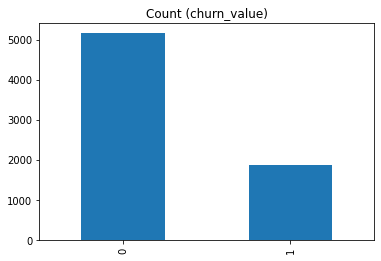

In [65]:
target_count = final_df.churn_value.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (churn_value)');

In [66]:
# Class count
count_class_0, count_class_1 = final_df.churn_value.value_counts()

# Divide by class
df_class_0 = final_df[final_df['churn_value'] == 0]
df_class_1 = final_df[final_df['churn_value'] == 1]

In [67]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

Random over-sampling:
1    5163
0    5163
Name: churn_value, dtype: int64


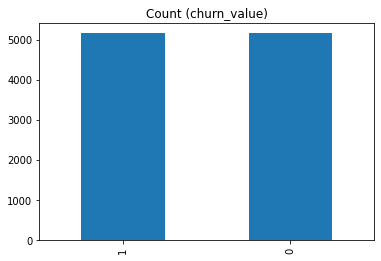

In [68]:
print('Random over-sampling:')
print(df_over.churn_value.value_counts())
df_over.churn_value.value_counts().plot(kind='bar', title='Count (churn_value)');

In [69]:
target_column = ['churn_value']
final_feature_array = df_over[numeric_column_final].to_numpy()
target_array = df_over[target_column].to_numpy()

In [70]:
print('shape of final feature:',final_feature_array.shape)
print('shape of target:',target_array.shape)

shape of final feature: (10326, 14)
shape of target: (10326, 1)


**Modelling**

In [71]:
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error

In [72]:
X = df_over.drop(['churn_value'],axis=1)
y = df_over['churn_value']

In [73]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    final_feature_array,
    target_array,
    train_size=0.8,
    random_state=0
    )

In [74]:
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(8260, 14)

Shape Data X Test:
(2066, 14)

Shape Data y Train:
(8260, 1)

Shape Data y Test:
(2066, 1)


**Support Vector Machine**

In [75]:
from sklearn.svm import SVC

In [76]:
svm=SVC(probability=True)

In [77]:
svm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [78]:
svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [79]:
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
target_array_pred = svm.predict(final_feature_array)

In [80]:
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred[:5])

Real Data
[[0]
 [1]
 [1]
 [0]
 [1]]

 Predicted Data
[0 1 1 0 0]


**Root Mean Square Error**

In [81]:
y_pred = svm.predict(X_test)

In [82]:
final_with_pred_df = df_over.copy()
final_with_pred_df['churn_predicted'] = target_array_pred.reshape(-1,)
final_with_pred_df.head(5)

,gender,partner,senior_citizen,multiple_line,internet_service,online_security,online_backup,device_protection,tech_support,paperless_billing,payment_method,churn_value,monthly_charges,tenure_month,churn_predicted
1869,0,1,0,0,0,0,1,0,0,1,2,0,29.85,1,1
1870,1,0,0,0,0,1,0,1,0,0,3,0,56.95,34,0
1871,1,0,0,0,0,1,0,1,1,0,0,0,42.30,45,0
1872,1,0,0,1,1,0,1,0,0,1,1,0,89.10,22,1
1873,0,0,0,0,0,1,0,0,0,0,3,0,29.75,10,0


In [83]:
rmse_training = mean_squared_error(y_true=y_train,y_pred=y_train_pred,squared=False)
rmse_test = mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False)

print('RMSE Training Data: {}'.format(rmse_training))
print('RMSE Test Data: {}'.format(rmse_test))

RMSE Training Data: 0.4069612185627073
RMSE Test Data: 0.418011704491591


In [84]:
print('R^2 score:',svm.score(X_train, y_train))

R^2 score: 0.8343825665859564


In [85]:
from scipy import stats
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [86]:
residual = (abs(target_array) - abs(target_array_pred))
sw = stats.shapiro(residual)
ks = stats.kstest(residual, 'norm')

print('Shapiro-Wilk test ---- statistic: {}, p-value: {}'.format(sw[0],sw[1]))
print('Kolmogorov-Smirnov test ---- statistic: {}, p-value: {}'.format(ks.statistic,ks.pvalue))

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test ---- statistic: 0.6782827377319336, p-value: 0.0
Kolmogorov-Smirnov test ---- statistic: 0.5, p-value: 0.0


**Receiver Operating Characteristic Area Under Curve**

In [87]:
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [88]:
model = sm.OLS(y_train,X_train)
results = model.fit()

In [89]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [90]:
y_score = svm.fit(X_train, y_train).predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
cm_test = confusion_matrix(y_pred, y_test)
y_pred_train = svm.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [92]:
accuracy_training = metrics.accuracy_score(y_train,y_train_pred)
accuracy_test = metrics.accuracy_score(y_test,y_test_pred)

In [93]:
print(results.summary())
print(' ')
print('Support Vector Machine Accuracy Training Data: {}'.format(accuracy_training))
print('Support Vector Machine Accuracy Test Data: {}'.format(accuracy_test))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.623e+30
Date:                Mon, 16 Aug 2021   Prob (F-statistic):                        0.00
Time:                        07:14:55   Log-Likelihood:                      2.5724e+05
No. Observations:                8260   AIC:                                 -5.144e+05
Df Residuals:                    8246   BIC:                                 -5.143e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

ROC AUC : 0.8248


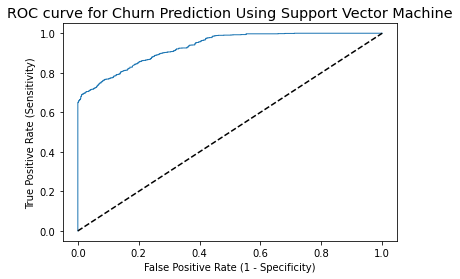

Cross validated ROC AUC : 0.9147


In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
Cross_validated_ROC_AUC = cross_val_score(svm, X_train, y_train, cv=5, scoring='roc_auc').mean()
ROC_AUC = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Churn Prediction Using Support Vector Machine')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
print('ROC AUC : {:.4f}'.format(ROC_AUC))
plt.show()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

**K-Fold Cross Validation**

In [95]:
scores = cross_val_score(svm, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Cross-validation scores:[0.80266344 0.83535109 0.81355932 0.8220339  0.80871671 0.81719128
 0.81840194 0.8062954  0.81719128 0.82445521]


In [96]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8166
